# The Value of Cultural Similarity for Predicting Migration


## Carolina Coimbra Vieira, Sophie Lohmann, Emilio Zagheni

**Variables**  
    *`iso_o, iso_d`*: ISO codes in three characters, refering to the country of origin and destination, respectively. 
    
+ **CEPII Language**  
    *`col`*: common official language (0 or 1); 19 languages considered.    
    *`csl`*: p(two random people understand a common language) >= *`cnl`*.  
    *`cnl`*: p(two random people share a native language).  
    *`lp`*: lexical closeness of native langauges; set to 0 when *`cnl`* is 1 or 0 also set to 0 if there is no dominant native language (e.g. India).  
    *`lp1`*: tree based. 4 possibilities, 2 languages belonging to:  
        0: separate family trees  
        0.25: different branches of same tree (English and French),  
        0.50: the same branch (English and German),  
        0.75: the same sub-branch (German and Dutch)  
    *`lp2`*: lexical similarity of 200 words, continuous scale 0-100 normalized *`lp1`*, *`lp2`* so coefficients are comparable to each other and *`col, prox1, prox2`* are unadjusted versions of *`lp1`* and *`lp2`*?  
    
  
+ **CEPII Distance**  
    *`contig`*: dummy variable indicating whether the two countries are contiguous (share a land border).  
    *`comlang_off, comlang_ethno`*: dummy variable indicating whether the two countries share a common language. There are two common languages dummies, the first one based on the fact that two countries share a common official language, and the other one set to one if a language is spoken by at least 9% of the population in both countries.
    *`dist`*: Geodesic distances from lat/long of most populous cities (simple distance).   
    *`distcap`*: geodesic distance between capital cities (simple distance).    
    *`distw`*: population weighted distance, theta = 1 (weighted distance).   
    *`distwces`*: population weighted distance, theta = -1, which corresponds to the usual coefficient estimated from gravity models of bilateral trade flows (weighted distance).  
    *`shared_hist`*: dummy variable indicating whether the two countries have: *`colony, comcol, curcol, col45, smctry`*     
    
    
+ **CEPII Geographic**   
    `area_o, area_d`: Country’s area in $km^2$.   
     
    
+ **UN Population 2019**   
    `pop_o, pop_d`: Country’s population.    
    
            
+ **World Bank GDP and GDP per capita constant 2010 US dollar 2019**   
    `GDP_o, GDP_d`: Country’s GDP in US dollar.  
    `GDP_percapita_o, GDP_percapita_d`: GDP per capita (constant 2010) in 2019 in US$
    
    
+ **Abel, Guy; E. Cohen, Joel (2019) Migrant Flow 2015-2020**   
    `m_flow_` (sd_drop_neg, sd_rev_neg, mig_rate, da_min_open, da_min_closed, da_pb_closed): migrant flow between two countries (o and d). 
    
    
+ **UN Migrant Stock 2019**   
    `m_stock`: migrant stock between two countries (o and d).   
    
    
+ **Facebook Food Cultural Similarity**  
    *`CD_nonsymm, CD_symm`*: cosine similarity between the vectors representing each country by the **top 50 dishes from origin country** and the **top (almost) 400 dishes** (top 50 dishes in all the countries), respectively.  

In [1]:
shhh <- suppressPackageStartupMessages # It's a library, so shhh!

shhh(library(tidyr))
shhh(library(dplyr))
shhh(library(readr))
shhh(library(MASS))
shhh(library(ggeffects))
shhh(library(ggplot2))
shhh(library(ggforce))
shhh(library(splines))
shhh(library(repr))
shhh(library(modelr))
shhh(library(broom))
shhh(library(scatterPlotMatrix))
shhh(library(tidyverse))
shhh(library(GGally))
shhh(library(htmlwidgets))
shhh(library(IRdisplay))
shhh(library(dotwhisker))
shhh(library(loo))
shhh(library(blmeco))
shhh(library(ggrepel))
shhh(library(corrplot))
shhh(library(RColorBrewer))

shhh(library("texreg"))
shhh(library(caret))

Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"
Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'MASS' was built under R version 4.1.3"
Warning message:
"package 'ggeffects' was built under R version 4.1.3"
Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'ggforce' was built under R version 4.1.3"
Warning message:
"package 'repr' was built under R version 4.1.3"
Warning message:
"package 'modelr' was built under R version 4.1.3"
Warning message:
"package 'broom' was built under R version 4.1.3"
Warning message:
"package 'scatterPlotMatrix' was built under R version 4.1.3"
Warning message:
"package 'tidyverse' was built under R version 4.1.3"
Warning message:
"package 'tibble' was built under R version 4.1.3"
Warning message:
"package 'purrr' was built under R version 4.1.3"
Warning message:
"package 'stringr' wa

In [2]:
set.seed(10)
windowsFonts(A = windowsFont("Times New Roman"))

# Data

In [3]:
gmodel_data <- read.csv("data/subset-final-dataset.csv")

head(gmodel_data)

,destination,origin,iso_d,iso_o,col,csl,cnl,prox1,lp1,prox2,...,log10_pop_o,log10_pop_d,log10_area_o,log10_area_d,log10_GDP_o,log10_GDP_d,log10_GDP_percapita_o,log10_GDP_percapita_d,log10_distwces,log10_distcap
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Argentina,Australia,ARG,AUS,0,0.02058416,0.00080000,0.25,1.945866,0.13052547,...,7.401456,7.651091,6.885748,6.441992,12.16152,11.64129,4.769883,4.104358,4.079842,4.069442
2,Argentina,Brazil,ARG,BRA,0,0.06052872,0.00080000,0.75,5.837599,0.42439765,...,8.324384,7.651091,6.930028,6.441992,12.37373,11.64129,3.934105,4.104358,3.319997,3.371669
3,Argentina,Chile,ARG,CHL,1,0.98010004,0.85439998,0.00,0.000000,0.00000000,...,7.277656,7.651091,5.879064,6.441992,11.45490,11.64129,4.138662,4.104358,2.973884,3.052431
4,Argentina,France,ARG,FRA,0,0.13392781,0.01039232,0.50,3.891733,0.25450581,...,7.813779,7.651091,5.738008,6.441992,12.47304,11.64129,4.589190,4.104358,4.038297,4.044236
5,Argentina,Great Britain,ARG,GBR,0,0.08325152,0.00000000,0.25,1.945866,0.13052547,...,7.829498,7.651091,5.387586,6.441992,12.46442,11.64129,4.676617,4.104358,4.046426,4.047177
6,Argentina,Indonesia,ARG,IDN,0,0.00000000,0.00000000,0.00,0.000000,0.07436915,...,8.432369,7.651091,6.286380,6.441992,12.08079,11.64129,3.590220,4.104358,4.192234,4.182865


In [4]:
dim(gmodel_data)

[1] 240  87

# Correlations

### Correlation between migration flows and geographic distances

Warning message:
"ggrepel: 230 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


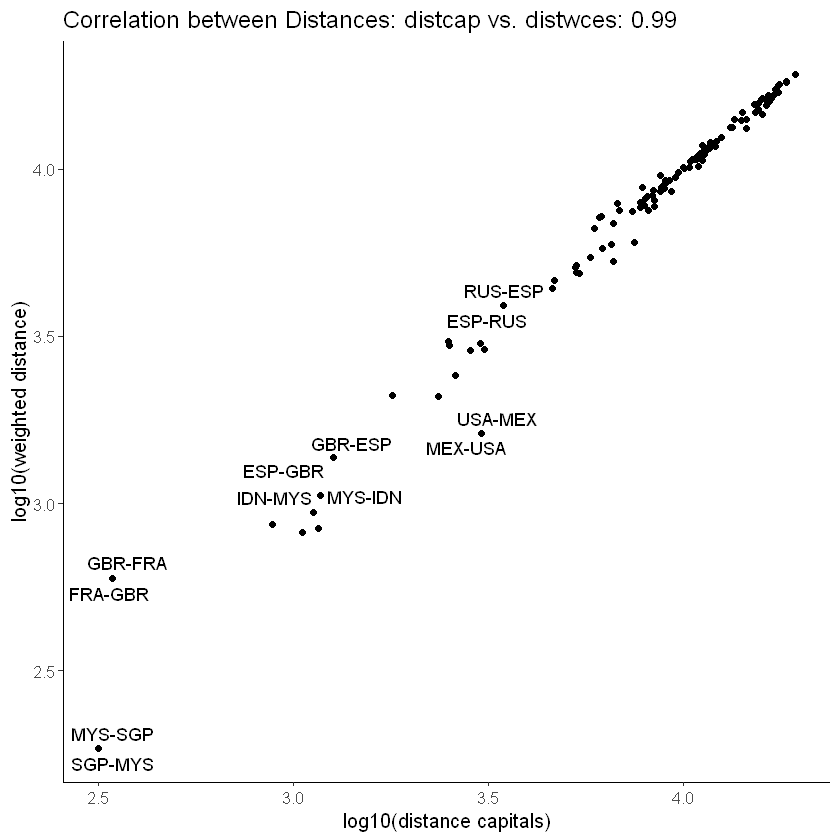

In [5]:
ggplot(gmodel_data, aes(x=log10_distcap, y=log10_distwces)) +
  geom_point() +
  geom_text_repel(label = paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d), max.overlaps = 8) +
  labs(title= paste0("Correlation between Distances: distcap vs. distwces: ", round(cor(gmodel_data$log10_distwces, gmodel_data$log10_distcap), 4)),
       x="log10(distance capitals)", y = "log10(weighted distance)") +
  theme_classic() +
  theme(text = element_text(size=12))

Warning message:
"ggrepel: 202 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


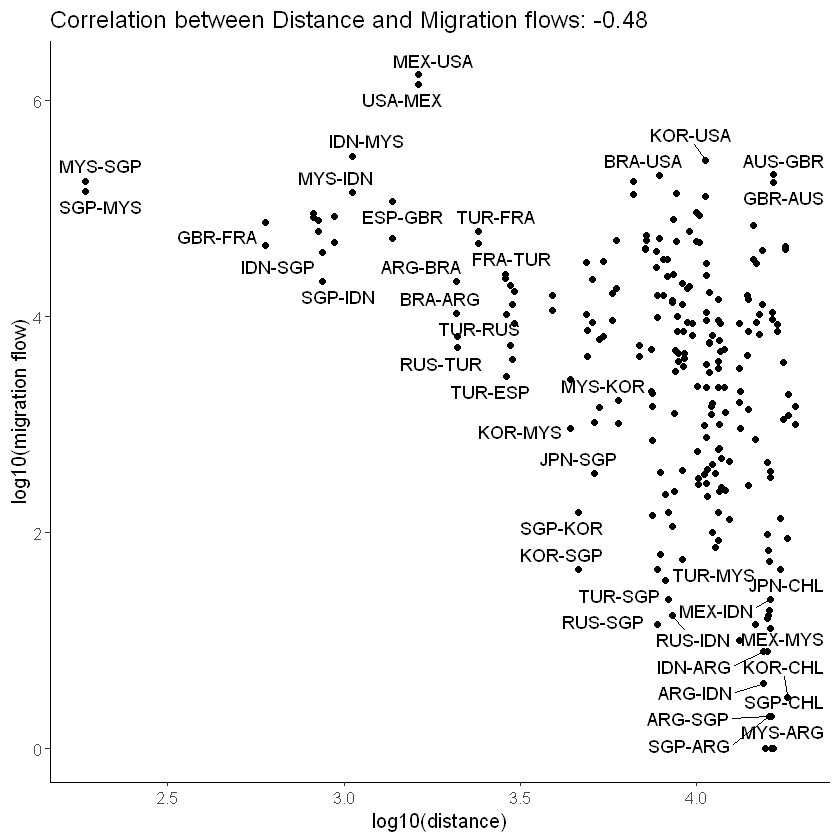

In [6]:
ggplot(gmodel_data, aes(x=log10_distwces, y=log10_m_flow_da_pb_closed)) +
  geom_point() +
  geom_text_repel(label = paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d), max.overlaps = 8) +
  labs(title= paste0("Correlation between Distance and Migration flows: ", round(cor(gmodel_data$log10_m_flow_da_pb_closed, gmodel_data$log10_distwces), 2)),
       x="log10(distance)", y = "log10(migration flow)") +
  theme_classic() +
  theme(text = element_text(size=12))

Warning message:
"ggrepel: 161 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


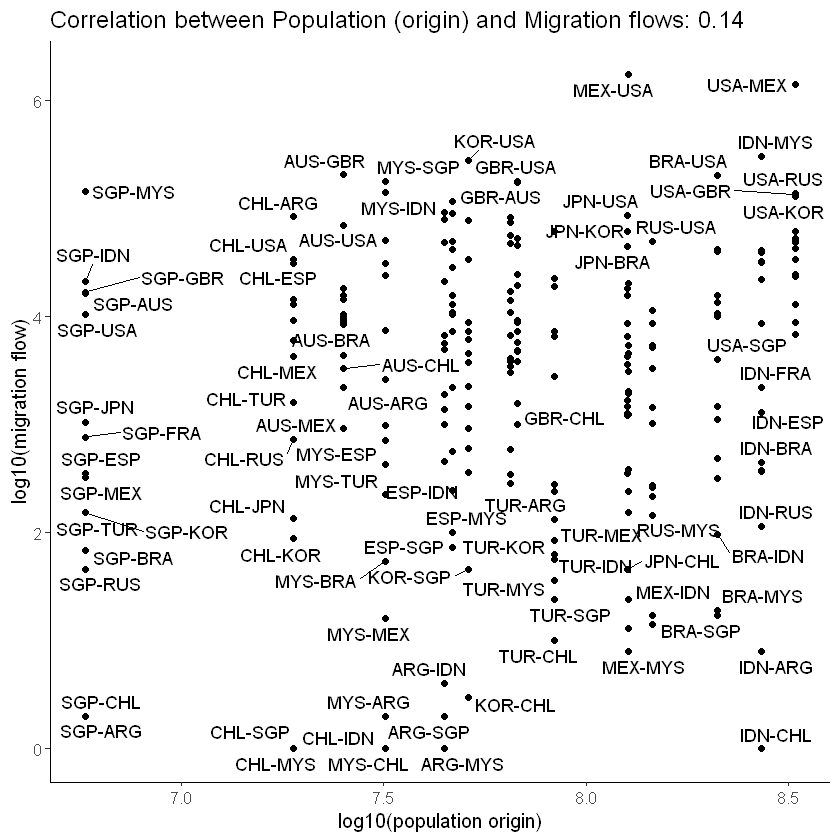

In [7]:
ggplot(gmodel_data, aes(x=log10_pop_o, y=log10_m_flow_da_pb_closed)) +
  geom_point() +
  geom_text_repel(label = paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d), max.overlaps = 8) +
  labs(title= paste0("Correlation between Population (origin) and Migration flows: ", round(cor(gmodel_data$log10_m_flow_da_pb_closed, gmodel_data$log10_pop_o), 2)),
       x="log10(population origin)", y = "log10(migration flow)") +
  theme_classic() +
  theme(text = element_text(size=12))

Warning message:
"ggrepel: 171 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


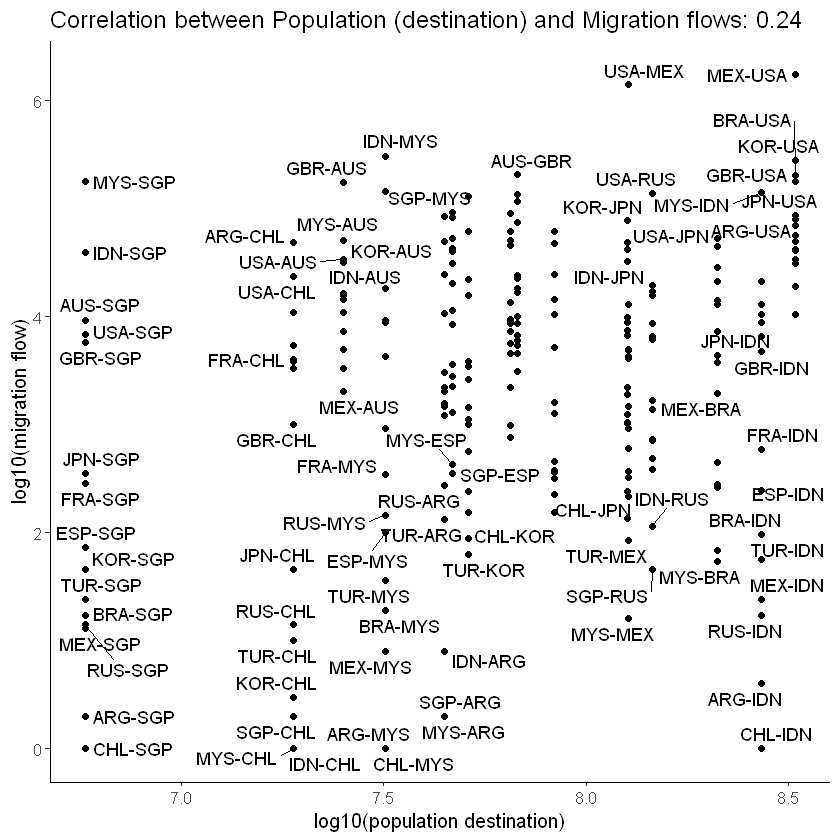

In [8]:
ggplot(gmodel_data, aes(x=log10_pop_d, y=log10_m_flow_da_pb_closed)) +
  geom_point() +
  geom_text_repel(label = paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d), max.overlaps = 8) +
  labs(title= paste0("Correlation between Population (destination) and Migration flows: ", round(cor(gmodel_data$log10_m_flow_da_pb_closed, gmodel_data$log10_pop_d), 2)),
       x="log10(population destination)", y = "log10(migration flow)") +
  theme_classic() +
  theme(text = element_text(size=12))

Warning message:
"ggrepel: 185 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


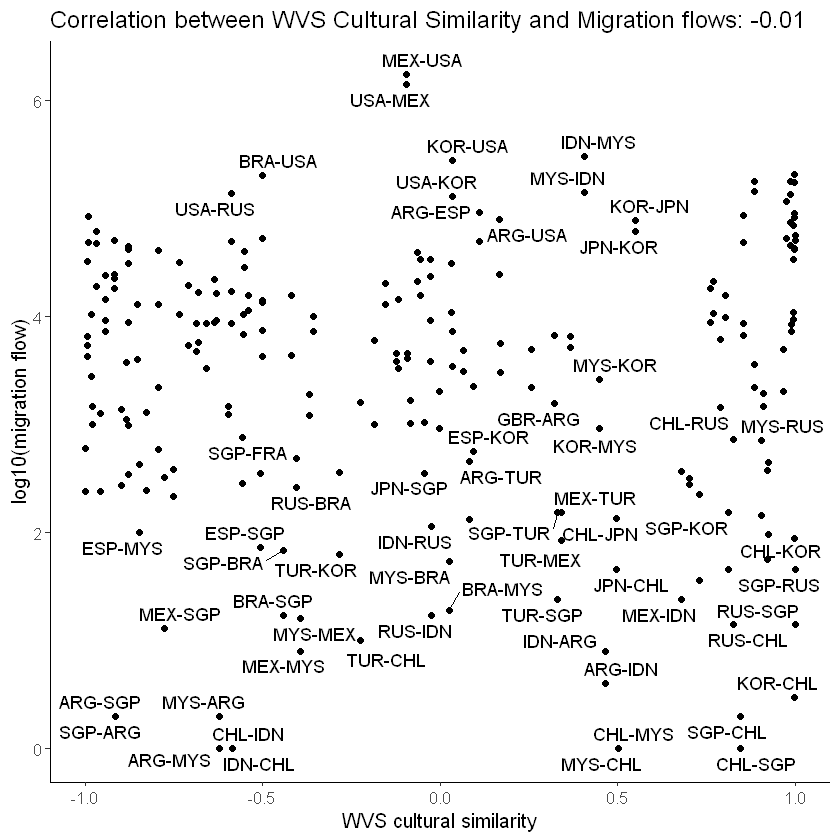

In [9]:
ggplot(gmodel_data, aes(x=CS_wvs, y=log10_m_flow_da_pb_closed)) +
  geom_point() +
  geom_text_repel(label = paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d), max.overlaps = 5) +
  labs(title= paste0("Correlation between WVS Cultural Similarity and Migration flows: ", round(cor(gmodel_data$log10_m_flow_da_pb_closed, gmodel_data$CS_wvs), 2)),
       x="WVS cultural similarity", y = "log10(migration flow)") +
  theme_classic() +
  theme(text = element_text(size=12))

### Correlations between CS cosine and CS Euclidean

Warning message:
"ggrepel: 202 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 203 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 203 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 203 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
"semi-transparency is not supported on this device: reported only once per page"


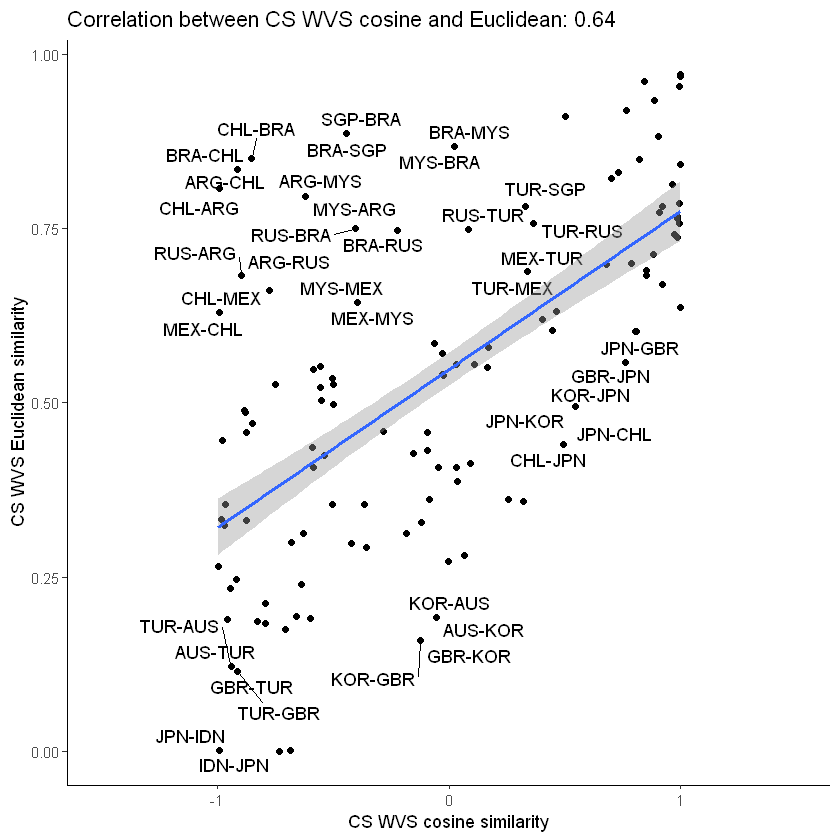

In [10]:
ggplot(gmodel_data, aes(x=CS_wvs, y=CS_euc_wvs)) +
  geom_point() +
  #geom_text(label=paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d)) +
  xlim(-1.5, 1.5) +
  geom_text_repel(label = paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d), max.overlaps = 8) +
  labs(title= paste0("Correlation between CS WVS cosine and Euclidean: ", round(cor(gmodel_data$CS_wvs, gmodel_data$CS_euc_wvs), 2)),
       x="CS WVS cosine similarity", y = "CS WVS Euclidean similarity") +
  theme_classic() +
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth")

ggsave("figs/corr_CS_wvs.pdf")
ggsave("figs/corr_CS_wvs.png")
ggsave("figs/Vieira_Figure_A2.eps")

Warning message:
"ggrepel: 230 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 230 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 230 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Saving 6.67 x 6.67 in image
Warning message:
"ggrepel: 230 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
"semi-transparency is not supported on this device: reported only once per page"


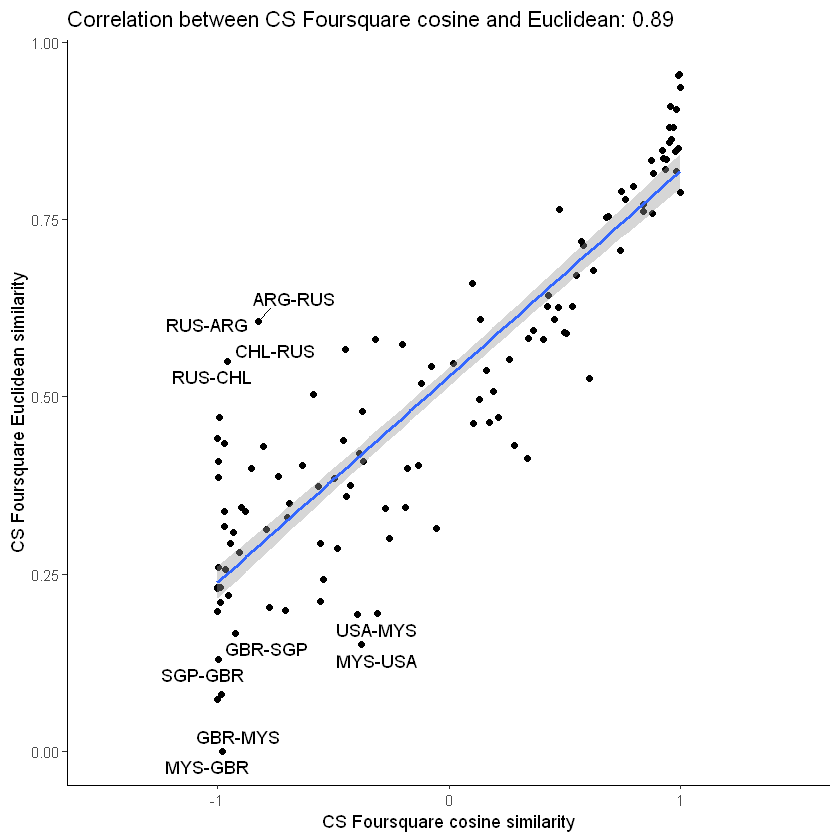

In [11]:
ggplot(gmodel_data, aes(x=CS_foursquare, y=CS_euc_foursquare)) +
  geom_point() +
  #geom_text(label=paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d)) +
  xlim(-1.5, 1.5) +
  geom_text_repel(label = paste0(gmodel_data$iso_o, "-", gmodel_data$iso_d), max.overlaps = 5) +
  labs(title= paste0("Correlation between CS Foursquare cosine and Euclidean: ", round(cor(gmodel_data$CS_foursquare, gmodel_data$CS_euc_foursquare), 2)),
       x="CS Foursquare cosine similarity", y = "CS Foursquare Euclidean similarity") +
  theme_classic() +
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth")

ggsave("figs/corr_CS_foursquare.pdf")
ggsave("figs/corr_CS_foursquare.png")
ggsave("figs/Vieira_Figure_A3.eps")

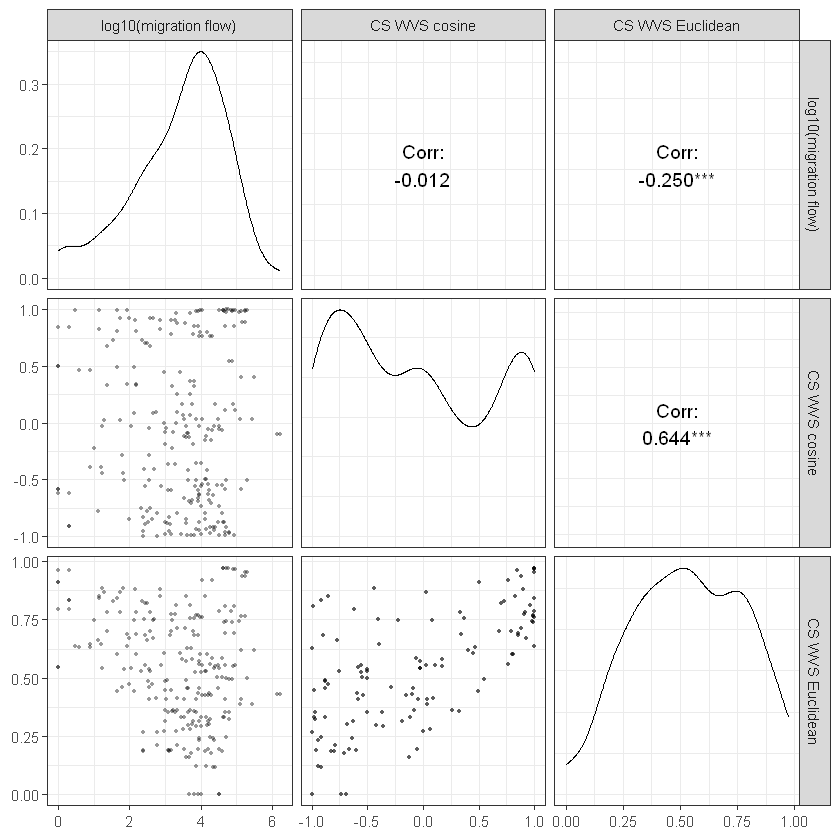

In [12]:
colnames <- c("log10(migration flow)", "CS WVS cosine", "CS WVS Euclidean")

# Scatter plot matrix with GGally
ggpairs(gmodel_data, 
        columns = c("log10_m_flow_da_pb_closed", "CS_wvs", "CS_euc_wvs"),
        columnLabels = colnames,
        upper = list(continuous = wrap('cor', size = 4, col="black")),
        lower = list(continuous = wrap("points", size=0.8, alpha=0.4, pch=16)),
        diag = list(continuous = wrap("densityDiag", alpha = 0.1))) + 

theme(axis.text = element_text(size = 8)) + theme_bw()

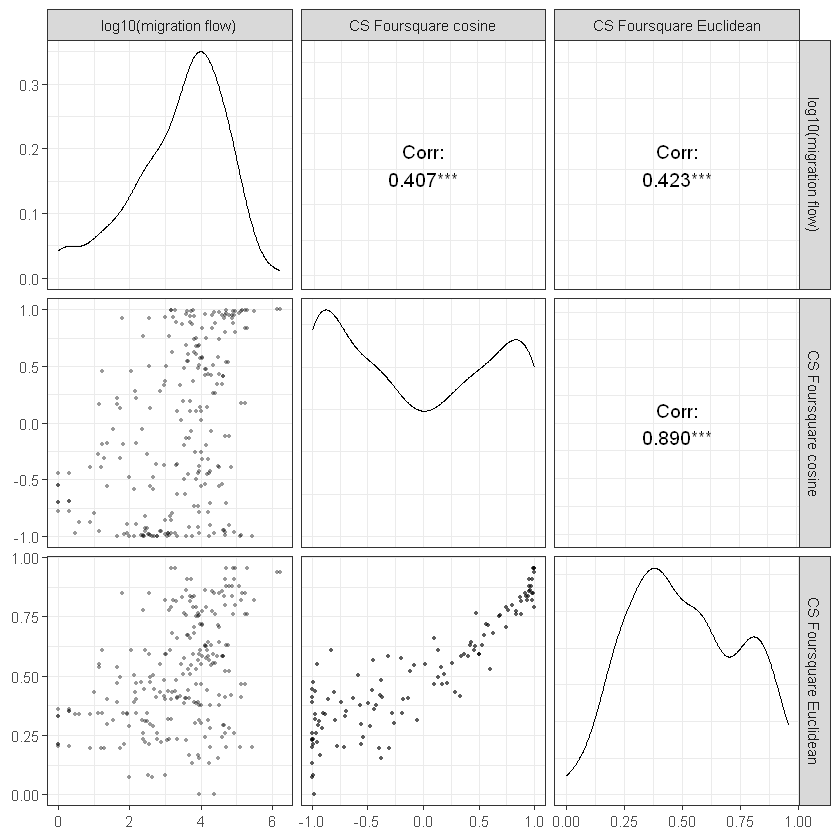

In [13]:
colnames <- c("log10(migration flow)", "CS Foursquare cosine", "CS Foursquare Euclidean")

# Scatter plot matrix with GGally
ggpairs(gmodel_data, 
        columns = c("log10_m_flow_da_pb_closed", "CS_foursquare", "CS_euc_foursquare"),
        columnLabels = colnames,
        upper = list(continuous = wrap('cor', size = 4, col="black")),
        lower = list(continuous = wrap("points", size=0.8, alpha=0.4, pch=16)),
        diag = list(continuous = wrap("densityDiag", alpha = 0.1))) + 

theme(axis.text = element_text(size = 8)) + theme_bw()

### Correlation between Facebook CS measures and other variables...

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"semi-transparency is not supported on this device: reported only once per page"


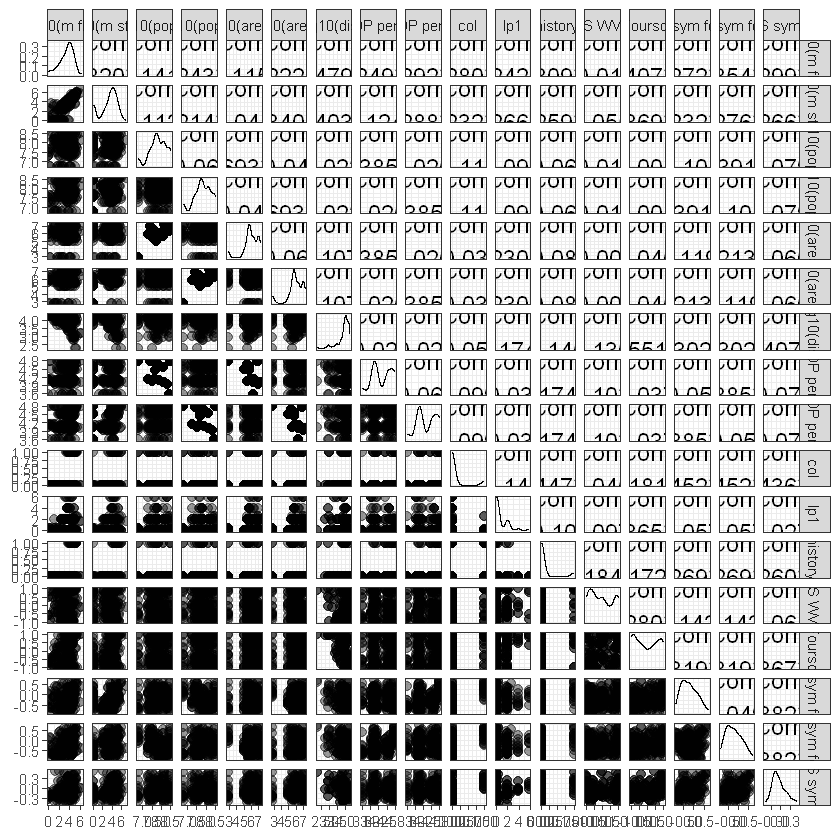

In [14]:
colnames <- c("log10(m flow)", "log10(m stock)", "log10(pop o)", "log10(pop d)",
              "log10(area o)", "log10(area d)", "log10(dist)", 
              "log10(GDP percapita o)", "log10(GDP percapita d)", 
              "col", "lp1", "history",
              "CS WVS", "CS Foursquare",
              "CS asym food o", "CS asym food d",
              "CS symm")


# Scatter plot matrix with GGally
ggpairs(gmodel_data, 
        columns = c("log10_m_flow_da_pb_closed", "log10_m_stock", 
                    "log10_pop_o", "log10_pop_d", 
                    "log10_area_o", "log10_area_d", 
                    "log10_distwces",
                    "log10_GDP_percapita_o", "log10_GDP_percapita_d",
                    "col", "lp1", "shared_hist", 
                    "CS_wvs", "CS_foursquare",
                    "CS_nonsymm_food_o", "CS_nonsymm_food_d", 
                    "CS_symm"),
        columnLabels = colnames,
        upper = list(continuous = wrap('cor', size = 5, col="black")),
        lower = list(continuous = wrap("points", size=4, alpha=0.4, pch=20)),
        diag = list(continuous = wrap("densityDiag", alpha = 0.1))) + 
theme(axis.text = element_text(size = 2), 
      strip.text.x = element_text(size = 2), 
      strip.text.y = element_text(size = 2), 
      axis.title.x = element_text(angle = 45)) + theme_bw()



ggsave("figs/corr_allvar.pdf", height = 26, width = 26)
ggsave("figs/corr_allvar.png", height = 26, width = 26)
ggsave("figs/Vieira_Figure_A1.eps", height = 26, width = 26)

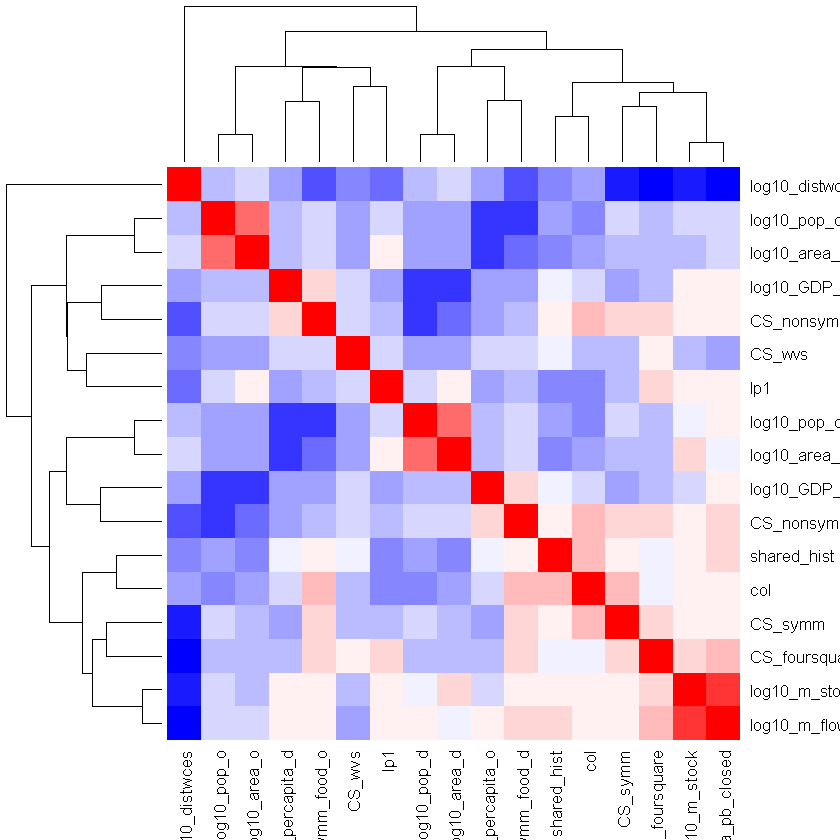

In [15]:
gdata_heatmap <- gmodel_data[,c("log10_m_flow_da_pb_closed", "log10_m_stock", 
                    "log10_pop_o", "log10_pop_d", 
                    "log10_area_o", "log10_area_d", 
                    "log10_distwces",
                    "log10_GDP_percapita_o", "log10_GDP_percapita_d",
                    "col", "lp1", "shared_hist", 
                    "CS_wvs", "CS_foursquare",
                    "CS_nonsymm_food_o", "CS_nonsymm_food_d", 
                    "CS_symm")]

cormat <- round(cor(gdata_heatmap),2)

col<- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = cormat, col = col, symm = TRUE)

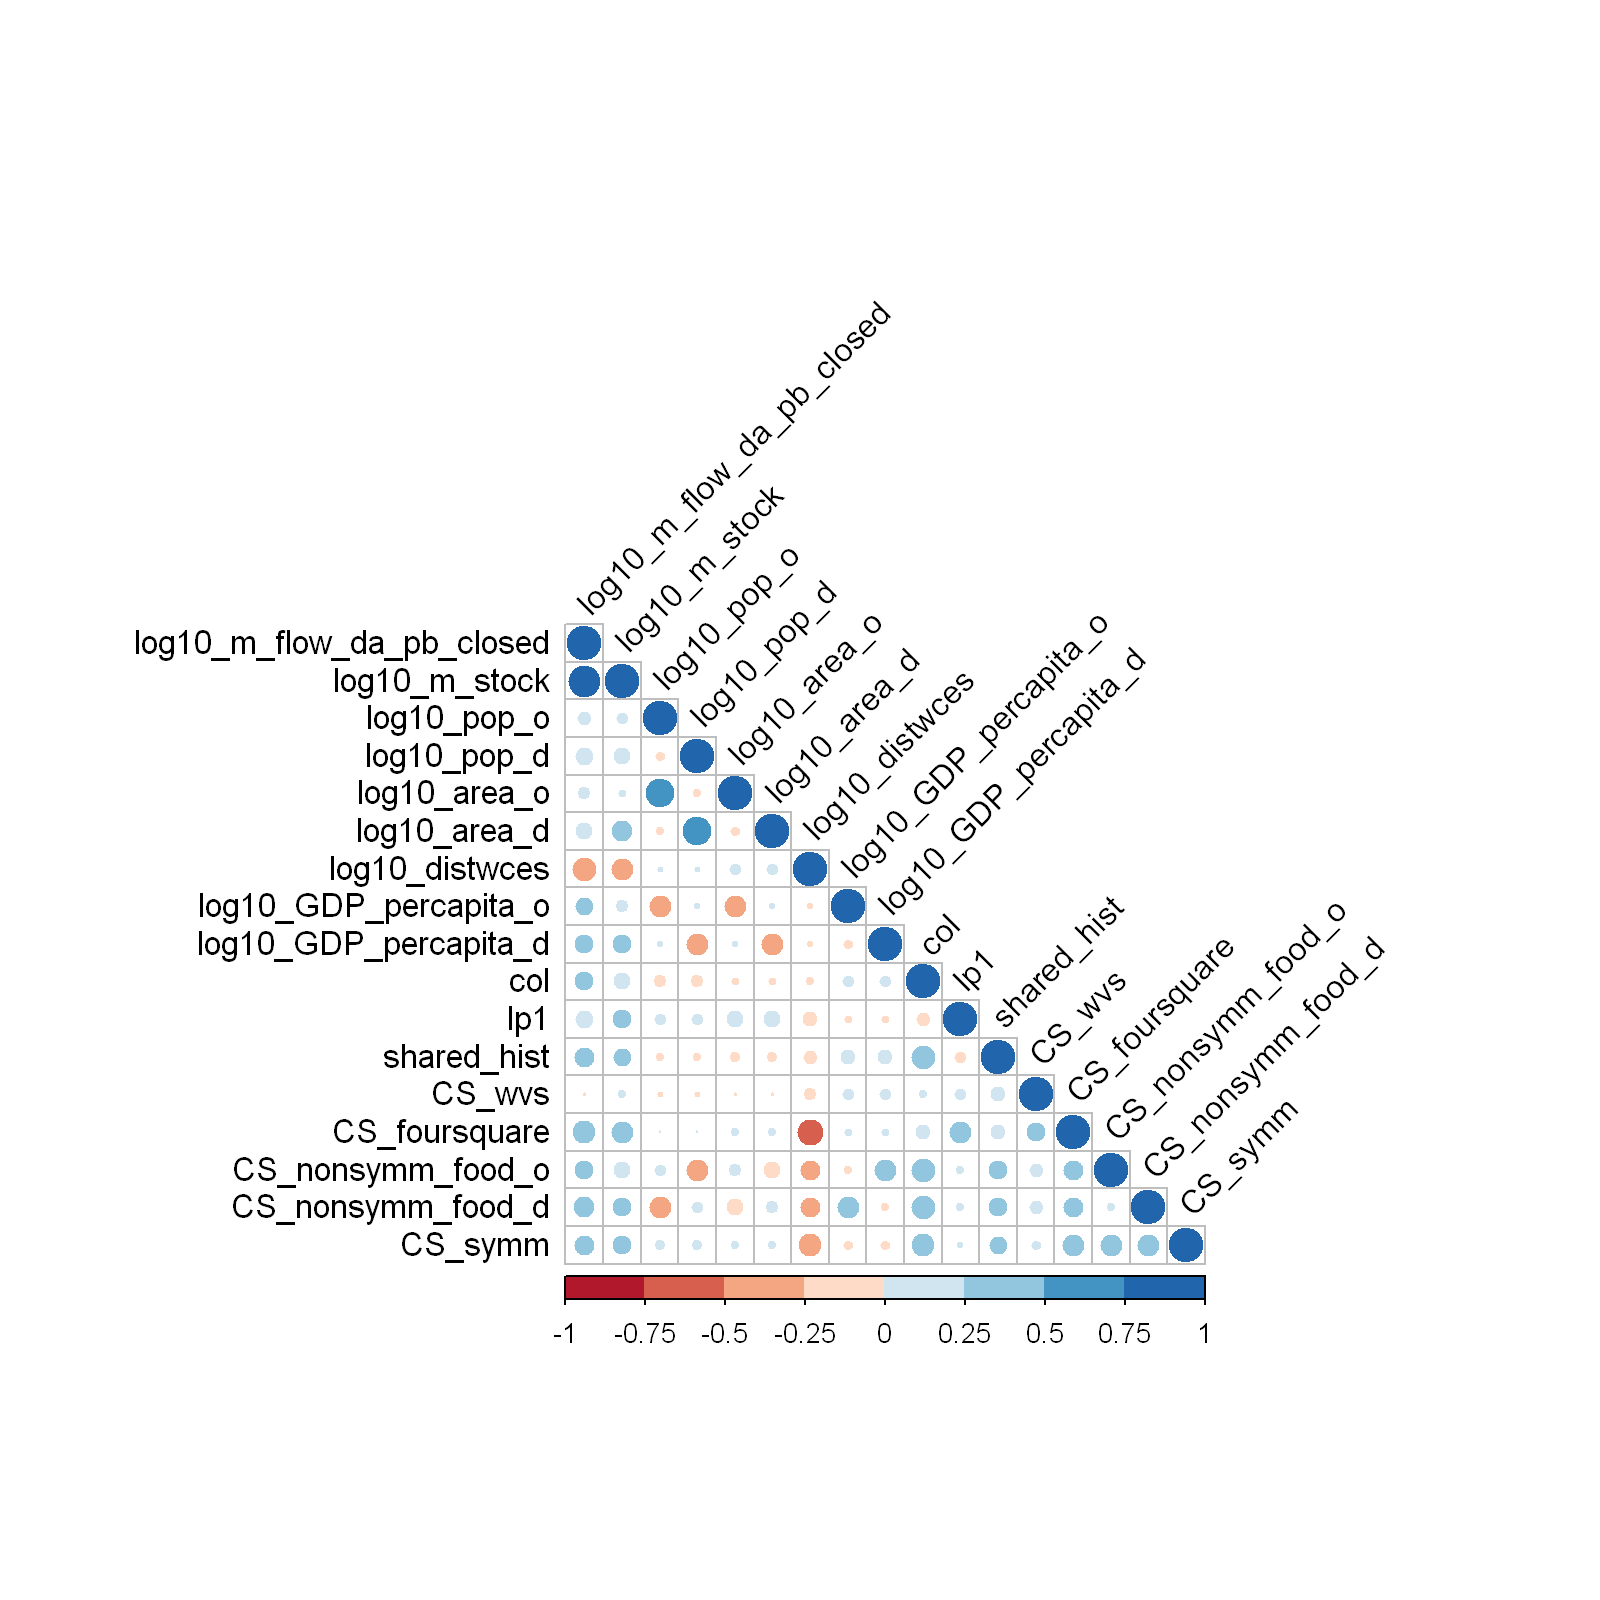

In [16]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 200)

corrplot(cormat, type = "lower", col=brewer.pal(n=8, name="RdBu"), tl.col = "black", tl.srt = 45)


# Model + Cross validation

In [17]:
countries <- c(unique(gmodel_data$destination))

In [18]:
crossval <- function(gmodel_data, cols, indicators){
    
    sel_col <- c("log10_m_flow_da_pb_closed", "log10_pop_o", "log10_area_o", 
                 "log10_pop_d", "log10_area_d", "log10_distwces")
    sel_col <- append(sel_col, cols)
        
    if (indicators){
        for (c in countries) {
            c <- str_replace(c, " ", ".")
            sel_col <- append(sel_col, paste0("destination_", c)) 
            sel_col <- append(sel_col, paste0("origin_", c)) 
        }
    }

    print(sel_col)
    
    gmodel_data_subset <- subset(gmodel_data, select = sel_col)
    
    # R program to implement
    # Leave one out cross validation

    # defining training control
    # as Leave One Out Cross Validation
    train_control <- trainControl(method = "LOOCV")

    # training the model by assigning m_flow_da_pb_closed column
    # as target variable and rest other column
    # as independent variable  

    m <- train(log10_m_flow_da_pb_closed ~ .,
                   data = gmodel_data_subset,
                   method = "lm",
                   trControl = train_control)

    # printing model performance metrics
    # along with other details
    print(m)
    
    return (m)
}

### Baseline: 

https://www.pnas.org/doi/10.1073/pnas.0808185105#supplementary-materials

The starting linear model was fitted [supporting information (SI) Table S1] with the dependent variable log(migrants) and with the six independent variables that we call “basic” [year minus 1985, log(ppnorig), log(areaorig), log(ppndest), log(areadest), log(distance)] and all indicator variables (orig.indicator, dest.indicator, orig.is.datasource, dest.is.datasource). The Multiple R2 was 0.5693 and the Adjusted R2 was 0.5689 (see Methods).

In [19]:
m_baseline <- crossval(gmodel_data, cols=NULL, indicators=FALSE)

[1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
[3] "log10_area_o"              "log10_pop_d"              
[5] "log10_area_d"              "log10_distwces"           
Linear Regression 

240 samples
  5 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.075526  0.3182449  0.864143

Tuning parameter 'intercept' was held constant at a value of TRUE


In [20]:
summary(m_baseline$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0244 -0.6677  0.1166  0.7533  2.5813 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.64403    2.16277   1.685  0.09334 .  
log10_pop_o     0.21376    0.21532   0.993  0.32187    
log10_area_o    0.17936    0.09472   1.893  0.05953 .  
log10_pop_d     0.36256    0.21532   1.684  0.09356 .  
log10_area_d    0.26291    0.09472   2.776  0.00596 ** 
log10_distwces -1.89206    0.19477  -9.714  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.062 on 234 degrees of freedom
Multiple R-squared:  0.3517,	Adjusted R-squared:  0.3378 
F-statistic: 25.39 on 5 and 234 DF,  p-value: < 2.2e-16


### Migrant stock

In [21]:
m_baseline_stocks <- crossval(gmodel_data, cols=c("log10_m_stock"), indicators=FALSE)

[1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
[3] "log10_area_o"              "log10_pop_d"              
[5] "log10_area_d"              "log10_distwces"           
[7] "log10_m_stock"            
Linear Regression 

240 samples
  6 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.7017264  0.7095327  0.512228

Tuning parameter 'intercept' was held constant at a value of TRUE


In [22]:
summary(m_baseline_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.48353 -0.34642  0.05507  0.39317  2.58138 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.19705    1.41754   0.139 0.889565    
log10_pop_o    -0.02674    0.14047  -0.190 0.849178    
log10_area_o    0.13978    0.06155   2.271 0.024063 *  
log10_pop_d     0.54080    0.14018   3.858 0.000148 ***
log10_area_d   -0.17378    0.06615  -2.627 0.009186 ** 
log10_distwces -0.64312    0.14437  -4.455  1.3e-05 ***
log10_m_stock   0.55899    0.03116  17.942  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6893 on 233 degrees of freedom
Multiple R-squared:  0.7278,	Adjusted R-squared:  0.7208 
F-statistic: 103.8 on 6 and 233 DF,  p-value: < 2.2e-16


### GDP

In [23]:
m_GDP_percapita <- crossval(gmodel_data, cols=c("log10_GDP_percapita_o", "log10_GDP_percapita_d"), indicators=FALSE)

[1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
[3] "log10_area_o"              "log10_pop_d"              
[5] "log10_area_d"              "log10_distwces"           
[7] "log10_GDP_percapita_o"     "log10_GDP_percapita_d"    
Linear Regression 

240 samples
  7 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7630091  0.6566334  0.5995611

Tuning parameter 'intercept' was held constant at a value of TRUE


In [24]:
summary(m_GDP_percapita$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6816 -0.4963 -0.0059  0.4257  1.9837 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -17.11696    2.03905  -8.395 4.64e-15 ***
log10_pop_o             0.48473    0.15426   3.142  0.00189 ** 
log10_area_o            0.29809    0.06785   4.394 1.70e-05 ***
log10_pop_d             0.70267    0.15426   4.555 8.46e-06 ***
log10_area_d            0.41178    0.06785   6.069 5.19e-09 ***
log10_distwces         -1.89788    0.13733 -13.820  < 2e-16 ***
log10_GDP_percapita_o   1.48310    0.14927   9.936  < 2e-16 ***
log10_GDP_percapita_d   1.86080    0.14927  12.466  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7485 on 232 degrees of freedom
Multiple R-squared:  0.6804,	Adjusted R-squared:  0.6708 
F-statistic: 70.57 on 7 and 232 DF,  p-value: < 2.2e-16


### GDP and migrant stocks

In [25]:
m_GDP_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d"), indicators=FALSE)

[1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
[3] "log10_area_o"              "log10_pop_d"              
[5] "log10_area_d"              "log10_distwces"           
[7] "log10_m_stock"             "log10_GDP_percapita_o"    
[9] "log10_GDP_percapita_d"    
Linear Regression 

240 samples
  8 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.6059432  0.783418  0.4559169

Tuning parameter 'intercept' was held constant at a value of TRUE


In [26]:
summary(m_GDP_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11362 -0.31926  0.00847  0.37626  1.93771 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -10.47912    1.70710  -6.139 3.59e-09 ***
log10_pop_o             0.23011    0.12386   1.858   0.0645 .  
log10_area_o            0.23367    0.05392   4.333 2.19e-05 ***
log10_pop_d             0.64440    0.12207   5.279 3.00e-07 ***
log10_area_d            0.01688    0.06318   0.267   0.7896    
log10_distwces         -0.99884    0.13253  -7.537 1.09e-12 ***
log10_m_stock           0.40124    0.03390  11.834  < 2e-16 ***
log10_GDP_percapita_o   1.03398    0.12398   8.340 6.74e-15 ***
log10_GDP_percapita_d   0.84227    0.14608   5.766 2.59e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5918 on 231 degrees of freedom
Multiple R-squared:  0.8011,	Adjusted R-squared:  0.7942 
F-statistic

#### GDP + Facebook

In [27]:
m_fb_asym_GDP_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                     "CS_nonsymm_food_o", "CS_nonsymm_food_d"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "CS_nonsymm_food_o"        
[11] "CS_nonsymm_food_d"        
Linear Regression 

240 samples
 10 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.593641  0.7921813  0.4528005

Tuning parameter 'intercept' was held constant at a value of TRUE


In [28]:
summary(m_fb_asym_GDP_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92919 -0.31149  0.02542  0.37543  1.74062 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -11.94879    1.70976  -6.989 3.00e-11 ***
log10_pop_o             0.38885    0.13048   2.980 0.003192 ** 
log10_area_o            0.18548    0.05412   3.428 0.000722 ***
log10_pop_d             0.74993    0.12736   5.888 1.38e-08 ***
log10_area_d           -0.01128    0.06249  -0.180 0.856952    
log10_distwces         -0.82063    0.13859  -5.921 1.16e-08 ***
log10_m_stock           0.38162    0.03355  11.374  < 2e-16 ***
log10_GDP_percapita_o   0.92859    0.12534   7.409 2.44e-12 ***
log10_GDP_percapita_d   0.80193    0.14751   5.436 1.39e-07 ***
CS_nonsymm_food_o       0.25827    0.12157   2.124 0.034702 *  
CS_nonsymm_food_d       0.38172    0.12331   3.096 0.002208 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [29]:
m_fb_sym_GDP_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                     "CS_symm"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "CS_symm"                  
Linear Regression 

240 samples
  9 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.604888  0.7842012  0.4563276

Tuning parameter 'intercept' was held constant at a value of TRUE


In [30]:
summary(m_fb_sym_GDP_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09031 -0.32439  0.02965  0.34121  1.85741 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -10.91862    1.71712  -6.359 1.08e-09 ***
log10_pop_o             0.23196    0.12329   1.881   0.0612 .  
log10_area_o            0.22900    0.05374   4.261 2.96e-05 ***
log10_pop_d             0.64225    0.12152   5.285 2.91e-07 ***
log10_area_d            0.01893    0.06290   0.301   0.7637    
log10_distwces         -0.92652    0.13805  -6.711 1.49e-10 ***
log10_m_stock           0.39308    0.03406  11.541  < 2e-16 ***
log10_GDP_percapita_o   1.05422    0.12393   8.506 2.31e-15 ***
log10_GDP_percapita_d   0.87409    0.14650   5.967 9.08e-09 ***
CS_symm                 0.35342    0.19898   1.776   0.0770 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5891 on 230 degrees of freedom
Multi

### Language and History

In [31]:
m_history_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                  "col", "lp1", "shared_hist"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "col"                      
[11] "lp1"                       "shared_hist"              
Linear Regression 

240 samples
 11 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE     Rsquared  MAE      
  0.58047  0.801347  0.4461103

Tuning parameter 'intercept' was held constant at a value of TRUE


In [32]:
summary(m_history_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92247 -0.29977  0.03691  0.38343  1.64796 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -12.12083    1.67341  -7.243 6.69e-12 ***
log10_pop_o             0.35310    0.12166   2.902 0.004068 ** 
log10_area_o            0.20393    0.05409   3.770 0.000208 ***
log10_pop_d             0.73933    0.11898   6.214 2.43e-09 ***
log10_area_d            0.03436    0.06191   0.555 0.579455    
log10_distwces         -1.04411    0.12862  -8.118 2.96e-14 ***
log10_m_stock           0.34392    0.03423  10.047  < 2e-16 ***
log10_GDP_percapita_o   1.02489    0.11879   8.628 1.08e-15 ***
log10_GDP_percapita_d   0.91454    0.14013   6.526 4.32e-10 ***
col                     0.59954    0.13953   4.297 2.57e-05 ***
lp1                     0.03152    0.02978   1.058 0.291007    
shared_hist             0.15985    0.14736   1.085 0.279189    
---

#### Langage and History + Facebook

In [33]:
m_fb_asym_history_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                       "col", "lp1", "shared_hist", "CS_nonsymm_food_o", "CS_nonsymm_food_d"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "col"                      
[11] "lp1"                       "shared_hist"              
[13] "CS_nonsymm_food_o"         "CS_nonsymm_food_d"        
Linear Regression 

240 samples
 13 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5845634  0.7986015  0.4498347

Tuning parameter 'intercept' was held constant at a value of TRUE


In [34]:
summary(m_fb_asym_history_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9106 -0.3013  0.0524  0.3698  1.5904 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -12.29745    1.69282  -7.264 6.01e-12 ***
log10_pop_o             0.39595    0.12914   3.066 0.002432 ** 
log10_area_o            0.19515    0.05563   3.508 0.000545 ***
log10_pop_d             0.73063    0.12603   5.797 2.25e-08 ***
log10_area_d            0.03134    0.06403   0.489 0.625045    
log10_distwces         -1.00972    0.14903  -6.775 1.06e-10 ***
log10_m_stock           0.34239    0.03462   9.889  < 2e-16 ***
log10_GDP_percapita_o   0.98887    0.12509   7.905 1.17e-13 ***
log10_GDP_percapita_d   0.92402    0.14897   6.203 2.62e-09 ***
col                     0.54411    0.17615   3.089 0.002260 ** 
lp1                     0.03048    0.02997   1.017 0.310249    
shared_hist             0.15669    0.14794   1.059 0.290645    
CS_nonsymm_fo

In [35]:
m_fb_sym_history_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                       "col", "lp1", "shared_hist", "CS_symm"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "col"                      
[11] "lp1"                       "shared_hist"              
[13] "CS_symm"                  
Linear Regression 

240 samples
 12 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5824329  0.8000229  0.4473616

Tuning parameter 'intercept' was held constant at a value of TRUE


In [36]:
summary(m_fb_sym_history_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.91979 -0.28319  0.02882  0.37008  1.67540 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -12.04344    1.67903  -7.173 1.03e-11 ***
log10_pop_o             0.36015    0.12223   2.947 0.003548 ** 
log10_area_o            0.20500    0.05418   3.784 0.000198 ***
log10_pop_d             0.74621    0.11953   6.243 2.09e-09 ***
log10_area_d            0.03572    0.06201   0.576 0.565160    
log10_distwces         -1.08046    0.13902  -7.772 2.67e-13 ***
log10_m_stock           0.34356    0.03427  10.024  < 2e-16 ***
log10_GDP_percapita_o   1.01625    0.11958   8.499 2.57e-15 ***
log10_GDP_percapita_d   0.90640    0.14078   6.438 7.11e-10 ***
col                     0.64474    0.15414   4.183 4.12e-05 ***
lp1                     0.03129    0.02982   1.049 0.295099    
shared_hist             0.16698    0.14789   1.129 0.260056    
CS_

### WVS CS

In [37]:
m_wvs_history_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                       "col", "lp1", "shared_hist", "CS_wvs"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "col"                      
[11] "lp1"                       "shared_hist"              
[13] "CS_wvs"                   
Linear Regression 

240 samples
 12 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5474182  0.8233077  0.4277293

Tuning parameter 'intercept' was held constant at a value of TRUE


In [38]:
summary(m_wvs_history_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72913 -0.31431  0.02108  0.36346  1.35814 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -12.90279    1.58182  -8.157 2.34e-14 ***
log10_pop_o             0.37021    0.11458   3.231  0.00142 ** 
log10_area_o            0.21364    0.05096   4.192 3.96e-05 ***
log10_pop_d             0.74278    0.11202   6.631 2.41e-10 ***
log10_area_d            0.06707    0.05859   1.145  0.25350    
log10_distwces         -1.15341    0.12271  -9.400  < 2e-16 ***
log10_m_stock           0.31598    0.03263   9.685  < 2e-16 ***
log10_GDP_percapita_o   1.10363    0.11275   9.788  < 2e-16 ***
log10_GDP_percapita_d   1.03292    0.13367   7.727 3.52e-13 ***
col                     0.60084    0.13136   4.574 7.87e-06 ***
lp1                     0.04663    0.02817   1.655  0.09925 .  
shared_hist             0.28958    0.14073   2.058  0.04076 *  
CS_

### Foursquare CS

In [39]:
m_foursquare_GDP_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                       "CS_foursquare"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "CS_foursquare"            
Linear Regression 

240 samples
  9 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6064816  0.7830487  0.4553055

Tuning parameter 'intercept' was held constant at a value of TRUE


In [40]:
summary(m_foursquare_GDP_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07162 -0.30558  0.00367  0.36254  1.97087 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -10.88170    1.74106  -6.250 1.97e-09 ***
log10_pop_o             0.24601    0.12453   1.975   0.0494 *  
log10_area_o            0.22274    0.05471   4.072 6.43e-05 ***
log10_pop_d             0.65816    0.12257   5.370 1.92e-07 ***
log10_area_d            0.00953    0.06345   0.150   0.8807    
log10_distwces         -0.91823    0.14967  -6.135 3.68e-09 ***
log10_m_stock           0.39690    0.03409  11.643  < 2e-16 ***
log10_GDP_percapita_o   1.02896    0.12397   8.300 8.86e-15 ***
log10_GDP_percapita_d   0.84342    0.14597   5.778 2.44e-08 ***
CS_foursquare           0.07639    0.06609   1.156   0.2489    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5914 on 230 degrees of freedom
Multi

In [41]:
m_foursquare_history_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                       "col", "lp1", "shared_hist", "CS_foursquare"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "col"                      
[11] "lp1"                       "shared_hist"              
[13] "CS_foursquare"            
Linear Regression 

240 samples
 12 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5826719  0.7998632  0.4478284

Tuning parameter 'intercept' was held constant at a value of TRUE


In [42]:
summary(m_foursquare_history_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.91785 -0.30463  0.04091  0.38176  1.64646 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -12.16558    1.69467  -7.179 9.93e-12 ***
log10_pop_o             0.35396    0.12201   2.901 0.004086 ** 
log10_area_o            0.20319    0.05436   3.738 0.000235 ***
log10_pop_d             0.74013    0.11932   6.203 2.59e-09 ***
log10_area_d            0.03372    0.06214   0.543 0.587948    
log10_distwces         -1.03205    0.14476  -7.130 1.33e-11 ***
log10_m_stock           0.34379    0.03431  10.020  < 2e-16 ***
log10_GDP_percapita_o   1.02436    0.11908   8.602 1.30e-15 ***
log10_GDP_percapita_d   0.91418    0.14045   6.509 4.79e-10 ***
col                     0.59509    0.14192   4.193 3.94e-05 ***
lp1                     0.02979    0.03130   0.952 0.342167    
shared_hist             0.15815    0.14797   1.069 0.286287    
CS_

### Multiple CS measures on the same model:

In [43]:
m_foursquare_wvs_history_stocks <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                       "col", "lp1", "shared_hist", "CS_wvs", "CS_foursquare"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "col"                      
[11] "lp1"                       "shared_hist"              
[13] "CS_wvs"                    "CS_foursquare"            
Linear Regression 

240 samples
 13 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5470949  0.8235305  0.4281124

Tuning parameter 'intercept' was held constant at a value of TRUE


In [44]:
summary(m_foursquare_wvs_history_stocks$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7184 -0.3342  0.0401  0.3506  1.3274 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -13.30849    1.60014  -8.317 8.49e-15 ***
log10_pop_o             0.37815    0.11438   3.306   0.0011 ** 
log10_area_o            0.20837    0.05093   4.091 5.98e-05 ***
log10_pop_d             0.74935    0.11179   6.703 1.61e-10 ***
log10_area_d            0.06410    0.05846   1.097   0.2740    
log10_distwces         -1.06478    0.13573  -7.845 1.71e-13 ***
log10_m_stock           0.31320    0.03259   9.611  < 2e-16 ***
log10_GDP_percapita_o   1.10447    0.11243   9.823  < 2e-16 ***
log10_GDP_percapita_d   1.03771    0.13334   7.783 2.53e-13 ***
col                     0.56567    0.13305   4.252 3.11e-05 ***
lp1                     0.03392    0.02933   1.156   0.2488    
shared_hist             0.28453    0.14037   2.027   0.0438 *  
CS_wvs       

#### Extra models

In [45]:
m_fb_asym_stocks_no_foursquare <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                 "col", "lp1", "shared_hist", "CS_wvs",
                                                 "CS_nonsymm_food_o", "CS_nonsymm_food_d"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "col"                      
[11] "lp1"                       "shared_hist"              
[13] "CS_wvs"                    "CS_nonsymm_food_o"        
[15] "CS_nonsymm_food_d"        
Linear Regression 

240 samples
 14 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5494793  0.8220217  0.4295649

Tuning parameter 'intercept' was held constant at a value of TRUE


In [46]:
summary(m_fb_asym_stocks_no_foursquare$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76144 -0.29049  0.03508  0.33794  1.28305 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -13.23488    1.59753  -8.285 1.06e-14 ***
log10_pop_o             0.43215    0.12137   3.561 0.000452 ***
log10_area_o            0.19778    0.05222   3.788 0.000195 ***
log10_pop_d             0.74845    0.11833   6.325 1.35e-09 ***
log10_area_d            0.05691    0.06027   0.944 0.346050    
log10_distwces         -1.07941    0.14042  -7.687 4.63e-13 ***
log10_m_stock           0.31507    0.03286   9.589  < 2e-16 ***
log10_GDP_percapita_o   1.04948    0.11790   8.901  < 2e-16 ***
log10_GDP_percapita_d   1.02768    0.14103   7.287 5.31e-12 ***
col                     0.48365    0.16567   2.919 0.003864 ** 
lp1                     0.04451    0.02824   1.576 0.116371    
shared_hist             0.28510    0.14071   2.026 0.043933 *  
CS_

In [47]:
m_fb_sym_stocks_no_foursquare <- crossval(gmodel_data, cols=c("log10_m_stock", "log10_GDP_percapita_o", "log10_GDP_percapita_d", 
                                                 "col", "lp1", "shared_hist", "CS_wvs",
                                                 "CS_symm"), indicators=FALSE)

 [1] "log10_m_flow_da_pb_closed" "log10_pop_o"              
 [3] "log10_area_o"              "log10_pop_d"              
 [5] "log10_area_d"              "log10_distwces"           
 [7] "log10_m_stock"             "log10_GDP_percapita_o"    
 [9] "log10_GDP_percapita_d"     "col"                      
[11] "lp1"                       "shared_hist"              
[13] "CS_wvs"                    "CS_symm"                  
Linear Regression 

240 samples
 13 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 239, 239, 239, 239, 239, 239, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5495697  0.8219353  0.4297451

Tuning parameter 'intercept' was held constant at a value of TRUE


In [48]:
summary(m_fb_sym_stocks_no_foursquare$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73172 -0.31555  0.03083  0.35165  1.38345 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -12.83145    1.58736  -8.084 3.79e-14 ***
log10_pop_o             0.37658    0.11512   3.271  0.00124 ** 
log10_area_o            0.21459    0.05104   4.204 3.77e-05 ***
log10_pop_d             0.74900    0.11254   6.655 2.11e-10 ***
log10_area_d            0.06825    0.05869   1.163  0.24603    
log10_distwces         -1.18618    0.13231  -8.965  < 2e-16 ***
log10_m_stock           0.31570    0.03267   9.664  < 2e-16 ***
log10_GDP_percapita_o   1.09567    0.11351   9.652  < 2e-16 ***
log10_GDP_percapita_d   1.02536    0.13431   7.634 6.35e-13 ***
col                     0.64181    0.14513   4.422 1.52e-05 ***
lp1                     0.04640    0.02821   1.645  0.10137    
shared_hist             0.29584    0.14121   2.095  0.03728 *  
CS_

## LATEX table
#### The final model from the Cross-validation using the FULL input dataset 

In [49]:
print(texreg(list(m_GDP_stocks$finalModel,
                  m_fb_asym_GDP_stocks$finalModel,
                  m_fb_sym_GDP_stocks$finalModel,
                  m_foursquare_GDP_stocks$finalModel,
                  m_history_stocks$finalModel, 
                  m_fb_asym_history_stocks$finalModel,
                  m_fb_sym_history_stocks$finalModel,
                  m_foursquare_history_stocks$finalModel,
                  m_wvs_history_stocks$finalModel, 
                  m_fb_asym_stocks_no_foursquare$finalModel, 
                  m_fb_sym_stocks_no_foursquare$finalModel, 
                  m_foursquare_wvs_history_stocks$finalModel), dcolumn = TRUE, booktabs = TRUE, 
       use.packages = FALSE, label = "tab:models_flow", caption = "Linear models", 
       float.pos = "h"))


\begin{table}[h]
\begin{center}
\begin{tabular}{l D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5} D{.}{.}{3.5}}
\toprule
 & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2} & \multicolumn{1}{c}{Model 3} & \multicolumn{1}{c}{Model 4} & \multicolumn{1}{c}{Model 5} & \multicolumn{1}{c}{Model 6} & \multicolumn{1}{c}{Model 7} & \multicolumn{1}{c}{Model 8} & \multicolumn{1}{c}{Model 9} & \multicolumn{1}{c}{Model 10} & \multicolumn{1}{c}{Model 11} & \multicolumn{1}{c}{Model 12} \\
\midrule
(Intercept)              & -10.48^{***} & -11.95^{***} & -10.92^{***} & -10.88^{***} & -12.12^{***} & -12.30^{***} & -12.04^{***} & -12.17^{***} & -12.90^{***} & -13.23^{***} & -12.83^{***} & -13.31^{***} \\
                         & (1.71)       & (1.71)       & (1.72)       & (1.74)       & (1.67)       & (1.69)       & (1.68)       & (1.69)       & (1.58)       & (1.60)       & (1.59)       & (1.60) 

## AIC, BIC, and WAIC

In [50]:
print("Model 1: Baseline")
print(m_GDP_stocks$finalModel)
print(summary(m_GDP_stocks)$adj.r.squared)
print(AIC(m_GDP_stocks$finalModel))
print(BIC(m_GDP_stocks$finalModel))
print(blmeco::WAIC(m_GDP_stocks$finalModel))

print("Model 1 + Asymmetric CS")
print(m_fb_asym_GDP_stocks$finalModel)
print(summary(m_fb_asym_GDP_stocks)$adj.r.squared)
print(AIC(m_fb_asym_GDP_stocks$finalModel))
print(BIC(m_fb_asym_GDP_stocks$finalModel))
print(blmeco::WAIC(m_fb_asym_GDP_stocks$finalModel))

print("Model 1 + Symmetric CS")
print(m_fb_sym_GDP_stocks$finalModel)
print(summary(m_fb_sym_GDP_stocks)$adj.r.squared)
print(AIC(m_fb_sym_GDP_stocks$finalModel))
print(BIC(m_fb_sym_GDP_stocks$finalModel))
print(blmeco::WAIC(m_fb_sym_GDP_stocks$finalModel))


print("Model 1 + Foursquare")
print(m_foursquare_GDP_stocks$finalModel)
print(summary(m_foursquare_GDP_stocks)$adj.r.squared)
print(AIC(m_foursquare_GDP_stocks$finalModel))
print(BIC(m_foursquare_GDP_stocks$finalModel))
print(blmeco::WAIC(m_foursquare_GDP_stocks$finalModel))


[1] "Model 1: Baseline"

Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
          (Intercept)            log10_pop_o           log10_area_o  
            -10.47912                0.23011                0.23367  
          log10_pop_d           log10_area_d         log10_distwces  
              0.64440                0.01688               -0.99884  
        log10_m_stock  log10_GDP_percapita_o  log10_GDP_percapita_d  
              0.40124                1.03398                0.84227  

[1] 0.7941625
[1] 440.1368
[1] 474.9431
$lppd
[1] -209.9492

$pwaic1
[1] 9.97853

$pwaic2
[1] 10.61499

$WAIC1
[1] 439.8554

$WAIC2
[1] 441.1283

[1] "Model 1 + Asymmetric CS"

Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
          (Intercept)            log10_pop_o           log10_area_o  
            -11.94879                0.38885                0.18548  
          log10_pop_d           log10_area_d         log10_distwces  
              0.74993               -0.01128   

In [51]:
print("Model 2: Model 1 + Shared language and history")
print(m_history_stocks$finalModel)
print(summary(m_history_stocks)$adj.r.squared)
print(AIC(m_history_stocks$finalModel))
print(BIC(m_history_stocks$finalModel))
print(blmeco::WAIC(m_history_stocks$finalModel))

print("Model 2 + Asymmetric CS")
print(m_fb_asym_history_stocks$finalModel)
print(summary(m_fb_asym_history_stocks)$adj.r.squared)
print(AIC(m_fb_asym_history_stocks$finalModel))
print(BIC(m_fb_asym_history_stocks$finalModel))
print(blmeco::WAIC(m_fb_asym_history_stocks$finalModel))

print("Model 2 + Symmetric CS")
print(m_fb_sym_history_stocks$finalModel)
print(summary(m_fb_sym_history_stocks)$adj.r.squared)
print(AIC(m_fb_sym_history_stocks$finalModel))
print(BIC(m_fb_sym_history_stocks$finalModel))
print(blmeco::WAIC(m_fb_sym_history_stocks$finalModel))

print("Model 2 + Foursquare")
print(m_foursquare_history_stocks$finalModel)
print(summary(m_foursquare_history_stocks)$adj.r.squared)
print(AIC(m_foursquare_history_stocks$finalModel))
print(BIC(m_foursquare_history_stocks$finalModel))
print(blmeco::WAIC(m_foursquare_history_stocks$finalModel))

[1] "Model 2: Model 1 + Shared language and history"

Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
          (Intercept)            log10_pop_o           log10_area_o  
            -12.12083                0.35310                0.20393  
          log10_pop_d           log10_area_d         log10_distwces  
              0.73933                0.03436               -1.04411  
        log10_m_stock  log10_GDP_percapita_o  log10_GDP_percapita_d  
              0.34392                1.02489                0.91454  
                  col                    lp1            shared_hist  
              0.59954                0.03152                0.15985  

[1] 0.8136577
[1] 419.1191
[1] 464.3674
$lppd
[1] -196.8455

$pwaic1
[1] 12.54154

$pwaic2
[1] 13.41062

$WAIC1
[1] 418.774

$WAIC2
[1] 420.5121

[1] "Model 2 + Asymmetric CS"

Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
          (Intercept)            log10_pop_o           log10_area_o  
            -12.29

In [52]:
print("Model 3: Model 2 + WVS")
print(m_wvs_history_stocks$finalModel)
print(summary(m_wvs_history_stocks)$adj.r.squared)
print(AIC(m_wvs_history_stocks$finalModel))
print(BIC(m_wvs_history_stocks$finalModel))
print(blmeco::WAIC(m_wvs_history_stocks$finalModel))

print("Model 3 + Asymmetric CS")
print(m_fb_asym_stocks_no_foursquare$finalModel)
print(summary(m_fb_asym_stocks_no_foursquare)$adj.r.squared)
print(AIC(m_fb_asym_stocks_no_foursquare$finalModel))
print(BIC(m_fb_asym_stocks_no_foursquare$finalModel))
print(blmeco::WAIC(m_fb_asym_stocks_no_foursquare$finalModel))

print("Model 3 + Symmetric CS")
print(m_fb_sym_stocks_no_foursquare$finalModel)
print(summary(m_fb_sym_stocks_no_foursquare)$adj.r.squared)
print(AIC(m_fb_sym_stocks_no_foursquare$finalModel))
print(BIC(m_fb_sym_stocks_no_foursquare$finalModel))
print(blmeco::WAIC(m_fb_sym_stocks_no_foursquare$finalModel))

print("Model 3 + Foursquare")
print(m_foursquare_wvs_history_stocks$finalModel)
print(summary(m_foursquare_wvs_history_stocks)$adj.r.squared)
print(AIC(m_foursquare_wvs_history_stocks$finalModel))
print(BIC(m_foursquare_wvs_history_stocks$finalModel))
print(blmeco::WAIC(m_foursquare_wvs_history_stocks$finalModel))

[1] "Model 3: Model 2 + WVS"

Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
          (Intercept)            log10_pop_o           log10_area_o  
            -12.90279                0.37021                0.21364  
          log10_pop_d           log10_area_d         log10_distwces  
              0.74278                0.06707               -1.15341  
        log10_m_stock  log10_GDP_percapita_o  log10_GDP_percapita_d  
              0.31598                1.10363                1.03292  
                  col                    lp1            shared_hist  
              0.60084                0.04663                0.28958  
               CS_wvs  
             -0.28747  

[1] 0.8348419
[1] 391.1004
[1] 439.8293
$lppd
[1] -182.2371

$pwaic1
[1] 13.02369

$pwaic2
[1] 14.1046

$WAIC1
[1] 390.5215

$WAIC2
[1] 392.6833

[1] "Model 3 + Asymmetric CS"

Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
          (Intercept)            log10_pop_o           log10_are

## PLOT correlations

In [53]:
gmodel_data_plot_corr <- gmodel_data %>% dplyr::select(c("log10_m_stock", "log10_m_flow_da_pb_closed", "CS_wvs", "CS_foursquare", "CS_nonsymm_food_o", "CS_nonsymm_food_d", "CS_symm"))

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"semi-transparency is not supported on this device: reported only once per page"


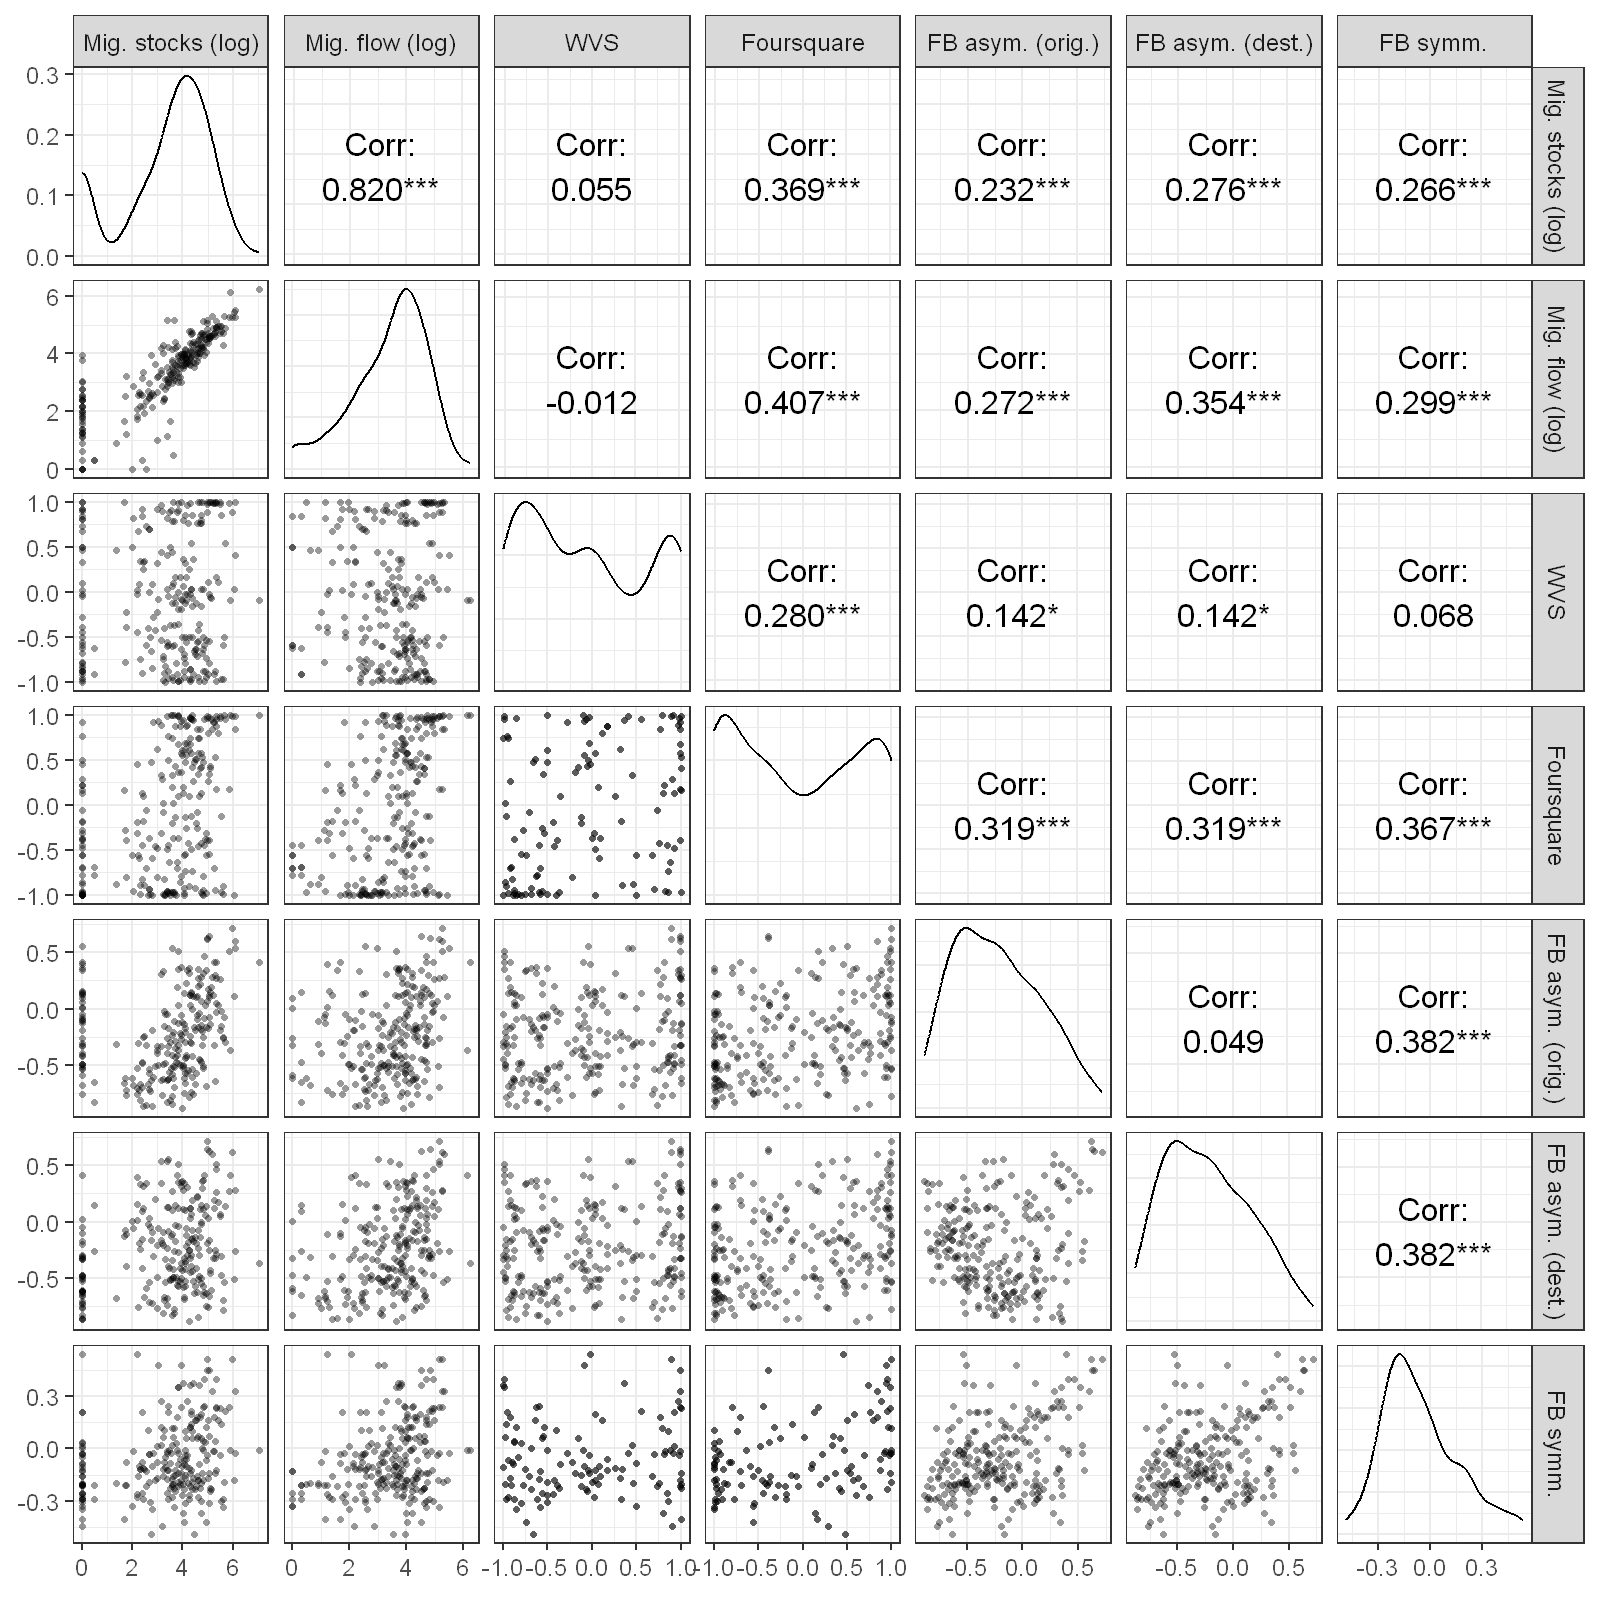

In [54]:
colnames <- c("Mig. stocks (log)", "Mig. flow (log)", "WVS", "Foursquare", "FB asym. (orig.)", "FB asym. (dest.)", "FB symm.")

# Scatter plot matrix with GGally
ggpairs(gmodel_data_plot_corr, 
        columns = c("log10_m_stock", "log10_m_flow_da_pb_closed", "CS_wvs", "CS_foursquare", "CS_nonsymm_food_o", "CS_nonsymm_food_d", "CS_symm"),
        columnLabels = colnames,
        upper = list(continuous = wrap('cor', size = 4, col="black")),
        lower = list(continuous = wrap("points", size=0.8, alpha=0.4, pch=16)),
        diag = list(continuous = wrap("densityDiag", alpha = 0.1))) + 

theme(axis.text = element_text(size = 8)) + theme_bw()

ggsave("figs/corr.png", width = 8, height = 8)
ggsave("figs/Vieira_Figure_1.eps", width = 8, height = 8)

In [55]:
jpeg("figs/corr-top50.jpeg", width = 900, height = 850, res=150, quality=100)

options(repr.plot.width=10, repr.plot.height=5)

# Correlation panel
panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cor(x, y), digits=2)
    txt <- paste0("R = ", r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, 0.5)
}
# Customize upper panel
upper.panel<-function(x, y){
  points(x, y, lw=1)
}
# Create the plots
pairs(~log10_m_flow_da_pb_closed + CS_wvs + CS_foursquare + CS_nonsymm_food_o + CS_nonsymm_food_d + CS_symm,
      data=gmodel_data,
      lower.panel = panel.cor,
      upper.panel = upper.panel, 
     cex.labels=0.5)

dev.off()

png 
  2

## PLOT coefficients

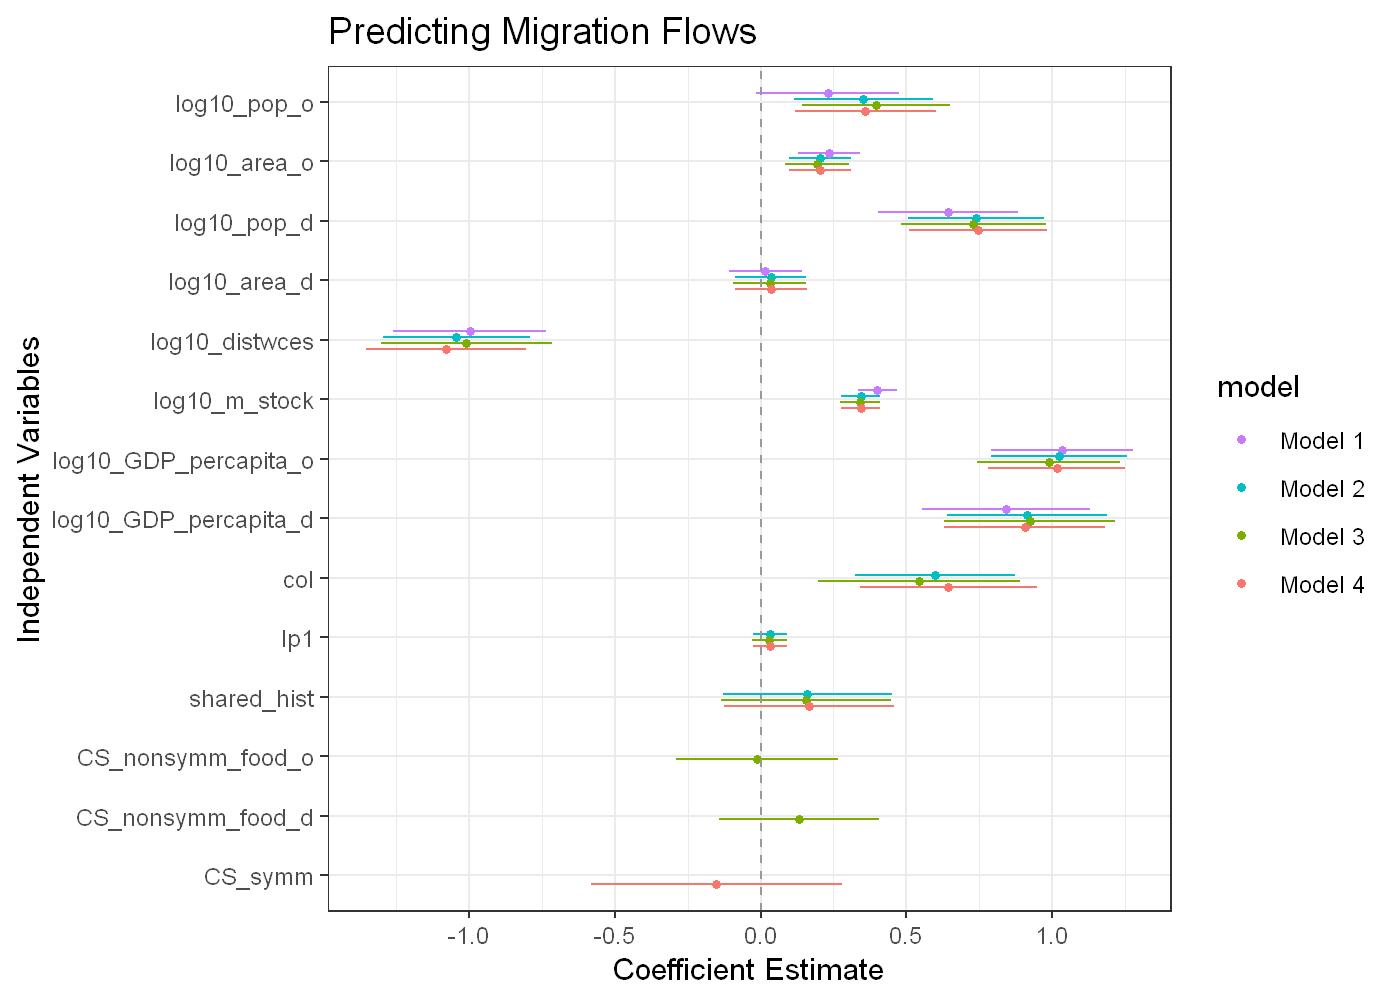

In [56]:
options(repr.plot.width=7, repr.plot.height=5)

dwplot((list(m_GDP_stocks$finalModel, m_history_stocks$finalModel, 
             m_fb_asym_history_stocks$finalModel, m_fb_sym_history_stocks$finalModel)),
       vline = geom_vline(
           xintercept = 0,
           colour = "grey60",
           linetype = 2
        )) +
# Setting `base_size` for fit the theme
# No need to set `base_size` in most usage
xlab("Coefficient Estimate") + ylab("Independent Variables") +
geom_vline(xintercept = 0,
           colour = "grey60",
           linetype = 2) +
ggtitle("Predicting Migration Flows") +
theme(
        text = element_text(),
        plot.title = element_text(face = "bold"),
        legend.position = c(0.9, 0.2),
        legend.background = element_rect(colour = "grey80"),
        legend.title = element_blank()
    ) + theme_bw()


## PLOT expected vs. predicted

In [57]:
pm_expected <- gmodel_data$log10_m_flow_da_pb_closed
#pm_baseline_stocks <- predict(m_baseline_stocks$finalModel)
pm_GDP_stocks <- predict(m_GDP_stocks$finalModel)
pm_fb_asym_GDP_stocks <- predict(m_fb_asym_GDP_stocks$finalModel)
pm_fb_sym_GDP_stocks <- predict(m_fb_sym_GDP_stocks$finalModel)

pm_history_stocks <- predict(m_history_stocks$finalModel)
pm_fb_asym_history_stocks <- predict(m_fb_asym_history_stocks$finalModel)
pm_fb_sym_history_stocks <- predict(m_fb_sym_history_stocks$finalModel)

pm_wvs_history_stocks <- predict(m_wvs_history_stocks$finalModel)
pm_fb_asym_stocks_no_foursquare <- predict(m_fb_asym_stocks_no_foursquare$finalModel)
pm_fb_sym_stocks_no_foursquare <- predict(m_fb_sym_stocks_no_foursquare$finalModel)


In [58]:
gmodel_data <- gmodel_data %>% mutate (label = paste(iso_o, iso_d, sep="-"))

In [59]:
png("figs/models.png", width=3, height=2.5, units="in", res=1000, pointsize=4)

options(repr.plot.width=10, repr.plot.height=5)

par(mfrow=c(3,3))

color_mpidr = "#ef7d00"

par(mar = c(4,4,4,4))
plot(pm_expected, pm_GDP_stocks, main="Model 1:\narea, population, distance, GDP,\nand migrant stocks", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="log predicted migration flow", cex.main=1, 
     col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_GDP_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

plot(pm_expected, pm_fb_asym_GDP_stocks, main="Model 1 + Facebook asymmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1.5,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_asym_GDP_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_sym_GDP_stocks, main="Model 1 + Facebook symmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_sym_GDP_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

#plot.new()
par(mar = c(4,4,4,4))
plot(pm_expected, pm_history_stocks, main="Model 2: Model 1\n+shared language and history", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="log predicted migration flow", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_history_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_asym_history_stocks, main="Model 2 + Facebook asymmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_asym_history_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_sym_history_stocks, main="Model 2 + Facebook symmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_sym_history_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_wvs_history_stocks, main="Model 3: Model 2\n+WVS cultural similarity", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="log expected migration flow", ylab="log predicted migration flow", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_wvs_history_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_asym_stocks_no_foursquare, main="Model 3 + Facebook asymmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="log expected migration flow", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_asym_stocks_no_foursquare)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_sym_stocks_no_foursquare, main="Model 3 + Facebook symmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="log expected migration flow", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_sym_stocks_no_foursquare)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

dev.off()


png 
  2

In [60]:
setEPS()
postscript("figs/Vieira_Figure_2.eps")

options(repr.plot.width=10, repr.plot.height=8.5)

par(mfrow=c(3,3))

color_mpidr = "#ef7d00"

par(mar = c(4,4,4,4))
plot(pm_expected, pm_GDP_stocks, main="Model 1:\narea, population, distance, GDP,\nand migrant stocks", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="log predicted migration flow", cex.main=1, 
     col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_GDP_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

plot(pm_expected, pm_fb_asym_GDP_stocks, main="Model 1 + Facebook asymmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1.5,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_asym_GDP_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_sym_GDP_stocks, main="Model 1 + Facebook symmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_sym_GDP_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

#plot.new()
par(mar = c(4,4,4,4))
plot(pm_expected, pm_history_stocks, main="Model 2: Model 1\n+shared language and history", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="log predicted migration flow", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_history_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_asym_history_stocks, main="Model 2 + Facebook asymmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_asym_history_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_sym_history_stocks, main="Model 2 + Facebook symmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_sym_history_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_wvs_history_stocks, main="Model 3: Model 2\n+WVS cultural similarity", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="log expected migration flow", ylab="log predicted migration flow", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_wvs_history_stocks)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_asym_stocks_no_foursquare, main="Model 3 + Facebook asymmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="log expected migration flow", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_asym_stocks_no_foursquare)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

par(mar = c(4,4,4,4))
plot(pm_expected, pm_fb_sym_stocks_no_foursquare, main="Model 3 + Facebook symmetric", 
     xlim=c(-.5,7), ylim=c(-.5,7), xlab="log expected migration flow", ylab="", cex.main=1, col=rgb(red=0, green=0, blue=0, alpha=0.4), pch=19, cex=0.8)
legend(1,1, bty="n", legend=paste("adj-R² =", format(summary(m_fb_sym_stocks_no_foursquare)$adj.r.squared, digits=2)))
segments(x0=-.5,y0=-.5,x1=7,y1=7, col = color_mpidr)

dev.off()


Warning message in plot.xy(xy, type, ...):
"semi-transparency is not supported on this device: reported only once per page"


png 
  2